# Loading the data #

In [108]:
!pip install scipy numpy matplotlib pandas sklearn

In [109]:
# If the data is from .mat file 
from scipy.io import loadmat

data = loadmat('mydata.mat')
mydata = data['mydata']


FileNotFoundError: [Errno 2] No such file or directory: 'mydata.mat'

In [ ]:
# If the data is in .csv

import pandas as pd

mydata = pd.read_csv('/Users/anastasia/Dropbox/Sleeper/sleep_onset_analysis/regression_so_samples.csv')

In [ ]:
mydata

,Label,Sbj_ID,delta_power,theta_power,alpha_power,beta_power,gamma_power,Delta_to_theta_ratio,Delta_to_alpha_ratio,Delta_to_beta_ratio,...,FC_LocalSimple_mean3_stderr,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,"Monophasic_vertices_count,","Biphasic_vertices_count,","Sleep_spindles_count,","K_complex_count,",O-information,S-information
0,30.0,2,-2.227239,-2.881242,-2.914913,-3.006317,-4.236144,0.654002,0.687673,0.779078,...,0.317828,0.341346,0.351454,0.655229,0,0,0.0,0,1.736714e-02,36.744121
1,29.9,2,-2.510277,-3.051248,-2.795123,-3.297378,-4.502453,0.540972,0.284847,0.787101,...,0.265078,0.279572,0.296324,0.677481,0,0,1.0,0,3.691503e-07,36.726755
2,29.8,2,-2.510277,-3.051248,-2.795123,-3.297378,-4.502453,0.540972,0.284847,0.787101,...,0.265078,0.279572,0.296324,0.677481,0,0,1.0,0,1.801798e+01,55.437880
3,29.7,2,-2.510277,-3.051248,-2.795123,-3.297378,-4.502453,0.540972,0.284847,0.787101,...,0.265078,0.279572,0.296324,0.677481,0,0,1.0,0,1.801798e+01,55.437880
4,29.6,2,-2.510277,-3.051248,-2.795123,-3.297378,-4.502453,0.540972,0.284847,0.787101,...,0.265078,0.279572,0.296324,0.677481,0,0,1.0,0,1.801798e+01,55.437880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1.0,2,-4.466863,-5.821591,-5.037376,-6.175448,-9.518900,1.354728,0.570513,1.708585,...,0.589730,0.517225,0.527181,1.697929,0,0,1.0,0,1.801798e+01,55.437880
291,0.9,2,-4.466863,-5.821591,-5.037376,-6.175448,-9.518900,1.354728,0.570513,1.708585,...,0.589730,0.517225,0.527181,1.697929,0,0,1.0,0,1.801798e+01,55.437880
292,0.8,2,-4.466863,-5.821591,-5.037376,-6.175448,-9.518900,1.354728,0.570513,1.708585,...,0.589730,0.517225,0.527181,1.697929,0,0,1.0,0,1.801798e+01,55.437880
293,0.7,2,-4.486138,-5.841763,-5.154642,-6.273938,-9.611015,1.355625,0.668504,1.787800,...,0.572007,0.521756,0.506507,1.830406,0,0,1.5,0,2.997499e-03,36.729752


In [ ]:
# Search for missing values
mydata.isnull().sum()



Label                       0
Sbj_ID                      0
delta_power                 0
theta_power                 0
alpha_power                 0
                           ..
Biphasic_vertices_count,    0
Sleep_spindles_count,       0
K_complex_count,            0
O-information               0
S-information               0
Length: 69, dtype: int64

In [ ]:
# Show whether there are any missing values
mydata.isnull().values.any()

False

In [ ]:
# Create X (3:end columns) and y (1st column) from the table 
X = mydata.iloc[:, 2:].values
y = mydata.iloc[:, 0].values
X.shape, y.shape

((295, 67), (295,))

In [ ]:
y

array([30. , 29.9, 29.8, 29.7, 29.6, 29.5, 29.4, 29.3, 29.2, 29.1, 29. ,
       28.9, 28.8, 28.7, 28.6, 28.5, 28.4, 28.3, 28.2, 28.1, 28. , 27.9,
       27.8, 27.7, 27.6, 27.5, 27.4, 27.3, 27.2, 27.1, 27. , 26.9, 26.8,
       26.7, 26.6, 26.5, 26.4, 26.3, 26.2, 26.1, 26. , 25.9, 25.8, 25.7,
       25.6, 25.5, 25.4, 25.3, 25.2, 25.1, 25. , 24.9, 24.8, 24.7, 24.6,
       24.5, 24.4, 24.3, 24.2, 24.1, 24. , 23.9, 23.8, 23.7, 23.6, 23.5,
       23.4, 23.3, 23.2, 23.1, 23. , 22.9, 22.8, 22.7, 22.6, 22.5, 22.4,
       22.3, 22.2, 22.1, 22. , 21.9, 21.8, 21.7, 21.6, 21.5, 21.4, 21.3,
       21.2, 21.1, 21. , 20.9, 20.8, 20.7, 20.6, 20.5, 20.4, 20.3, 20.2,
       20.1, 20. , 19.9, 19.8, 19.7, 19.6, 19.5, 19.4, 19.3, 19.2, 19.1,
       19. , 18.9, 18.8, 18.7, 18.6, 18.5, 18.4, 18.3, 18.2, 18.1, 18. ,
       17.9, 17.8, 17.7, 17.6, 17.5, 17.4, 17.3, 17.2, 17.1, 17. , 16.9,
       16.8, 16.7, 16.6, 16.5, 16.4, 16.3, 16.2, 16.1, 16. , 15.9, 15.8,
       15.7, 15.6, 15.5, 15.4, 15.3, 15.2, 15.1, 15

# Regression from single feature veactor of extracted EEG period 

In [ ]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 6.2 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


## Random forest ##


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# Split the data in the train, evaluation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)


# Evaluate the model using cross-validation and save the predictions

predictions = cross_val_predict(rf_regressor, X_train, y_train, cv=10)



# Make predictions on the test set (initial results)
#predictions = rf_regressor.predict(X_test)

In [113]:
# Evaluate the model using cross-validation and save the predictions
predictions = cross_val_predict(rf_regressor, X_train, y_train, cv=10)


# Calculate the mean absolute error
errors = abs(predictions - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_train)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.37 degrees.
Accuracy: 78.65 %.


Mean squared error:  4.628479053013391
Root mean squared error:  2.151390028101225
R-squared score:  0.93727707305097


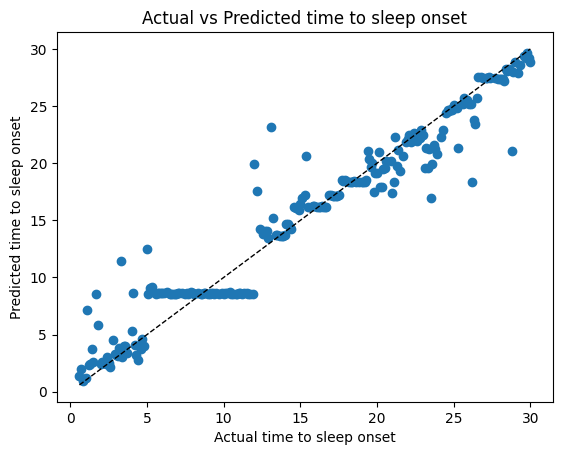

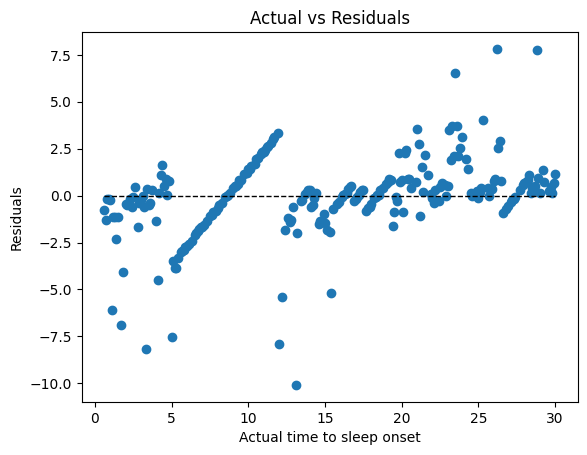

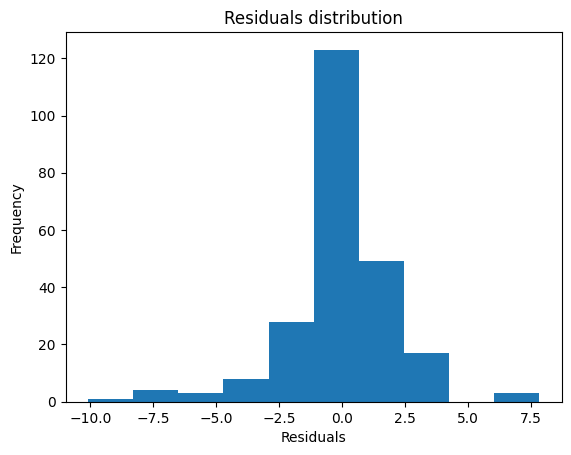

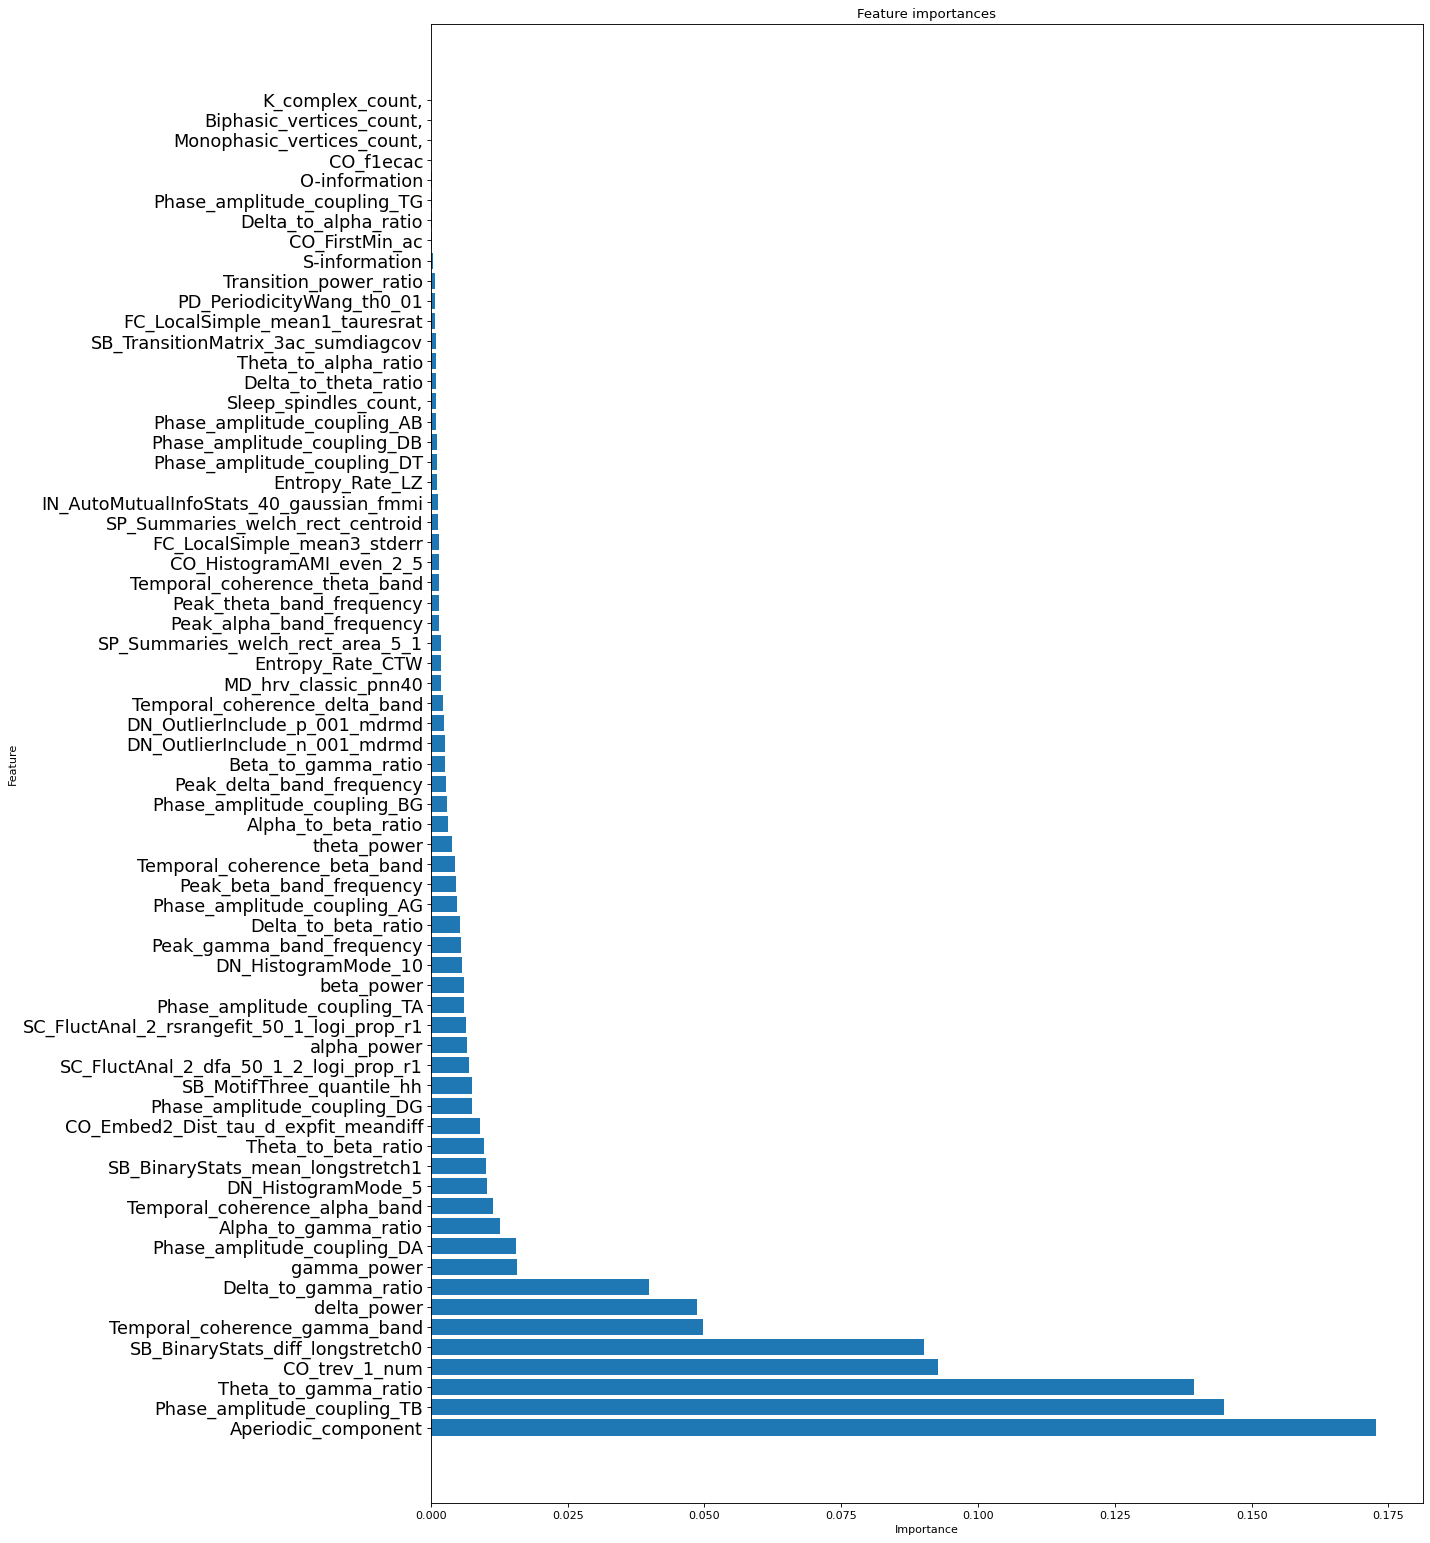

In [116]:

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate the mean squared error
mse = mean_squared_error(y_train, predictions)
# Calculate the root mean squared error
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_train, predictions)

print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('R-squared score: ', r2)

# Plot the predictions vs the actual values and reference line

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)
plt.scatter(y_train, predictions)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted time to sleep onset')
plt.show()

# Plot the residuals with a reference line at 0
residuals = y_train - predictions
plt.scatter(y_train, residuals)
plt.plot([y_train.min(), y_train.max()], [0, 0], 'k--', lw=1)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

# Plot the residuals distribution

plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])


importances = rf_regressor.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importances
names = [mydata.columns[i+2] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()


# Plot the feature importances in a vertical bar chart
#plt.bar(range(X.shape[1]), importances)
#plt.xticks(range(X.shape[1]), mydata.columns[2:], rotation=90)
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Feature importances')
#plt.show()



#importances = rf_regressor.feature_importances_
#plt.bar(range(X.shape[1]), importances)
#plt.xticks(range(X.shape[1]), mydata.columns[2:], rotation=90)
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Feature importances')
#plt.show()



### Rank the feature importance

In [117]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame

feature_importances = pd.DataFrame({"feature": mydata.columns[2:], "importance": importances})

#feature_importances = pd.DataFrame({"feature": df.columns, "importance": importances})

# Sort the DataFrame to show the features with the highest importance first
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

print(feature_importances)

                             feature  importance
60               Aperiodic_component    0.172655
31       Phase_amplitude_coupling_TB    0.144957
11              Theta_to_gamma_ratio    0.139499
41                     CO_trev_1_num    0.092603
52  SB_BinaryStats_diff_longstretch0    0.090161
..                               ...         ...
65                     O-information    0.000120
38                         CO_f1ecac    0.000059
61        Monophasic_vertices_count,    0.000000
62          Biphasic_vertices_count,    0.000000
64                  K_complex_count,    0.000000

[67 rows x 2 columns]


### Perform feature selection

In [125]:
# Decide on the number of features to select (e.g., the top 50%)
k = len(mydata.columns) *60 // 100

# Select the top k features

top_k_features = feature_importances["feature"][:k]
top_k_features




60                            Aperiodic_component
31                    Phase_amplitude_coupling_TB
11                           Theta_to_gamma_ratio
41                                  CO_trev_1_num
52               SB_BinaryStats_diff_longstretch0
25                  Temporal_coherence_gamma_band
0                                     delta_power
8                            Delta_to_gamma_ratio
4                                     gamma_power
27                    Phase_amplitude_coupling_DA
13                           Alpha_to_gamma_ratio
23                  Temporal_coherence_alpha_band
36                             DN_HistogramMode_5
43               SB_BinaryStats_mean_longstretch1
10                            Theta_to_beta_ratio
46           CO_Embed2_Dist_tau_d_expfit_meandiff
29                    Phase_amplitude_coupling_DG
53                      SB_MotifThree_quantile_hh
55         SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1
2                                     alpha_power


In [126]:
# Create a new subset of the data with only the selected features
X_subset = mydata[top_k_features]

# Split the data in the train and test
X_train_after_selection, X_test_after_selection, y_train_after_selection, y_test_after_selection = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor_after_selection = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor_after_selection.fit(X_train_after_selection, y_train_after_selection)

# Evaluate the model using cross-validation and save the predictions
predictions_after_selection = cross_val_predict(rf_regressor_after_selection, X_train_after_selection, y_train_after_selection, cv=10)


# Make predictions on the test set (initial results)
#predictions_after_selection = rf_regressor_after_selection.predict(X_test_after_selection)




In [127]:
X_subset

,Aperiodic_component,Phase_amplitude_coupling_TB,Theta_to_gamma_ratio,CO_trev_1_num,SB_BinaryStats_diff_longstretch0,Temporal_coherence_gamma_band,delta_power,Delta_to_gamma_ratio,gamma_power,Phase_amplitude_coupling_DA,...,Phase_amplitude_coupling_BG,Peak_delta_band_frequency,Beta_to_gamma_ratio,DN_OutlierInclude_n_001_mdrmd,DN_OutlierInclude_p_001_mdrmd,Temporal_coherence_delta_band,MD_hrv_classic_pnn40,Entropy_Rate_CTW,SP_Summaries_welch_rect_area_5_1,Peak_alpha_band_frequency
0,0.655229,0.007610,1.321231,0.002847,5.0,0.074963,-2.227239,0.033671,-4.236144,0.294325,...,0.012198,0.583333,2.008904,-0.367839,0.043294,0.225421,0.469381,0.341346,0.433759,5.416667
1,0.677481,0.011034,1.707329,-0.000540,5.0,0.070240,-2.510277,-0.256125,-4.502453,0.252343,...,0.005882,0.750000,1.992176,0.065104,-0.123698,0.189743,0.466775,0.279572,0.453888,5.916667
2,0.677481,0.011034,1.707329,-0.000540,5.0,0.070240,-2.510277,-0.256125,-4.502453,0.252343,...,0.005882,0.750000,1.992176,0.065104,-0.123698,0.189743,0.466775,0.279572,0.453888,5.916667
3,0.677481,0.011034,1.707329,-0.000540,5.0,0.070240,-2.510277,-0.256125,-4.502453,0.252343,...,0.005882,0.750000,1.992176,0.065104,-0.123698,0.189743,0.466775,0.279572,0.453888,5.916667
4,0.677481,0.011034,1.707329,-0.000540,5.0,0.070240,-2.510277,-0.256125,-4.502453,0.252343,...,0.005882,0.750000,1.992176,0.065104,-0.123698,0.189743,0.466775,0.279572,0.453888,5.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1.697929,0.023652,4.481524,0.002209,12.5,0.134072,-4.466863,-0.784215,-9.518900,0.176854,...,0.015661,1.416667,5.052037,0.119954,-0.285807,0.175897,0.896091,0.517225,0.934572,11.000000
291,1.697929,0.023652,4.481524,0.002209,12.5,0.134072,-4.466863,-0.784215,-9.518900,0.176854,...,0.015661,1.416667,5.052037,0.119954,-0.285807,0.175897,0.896091,0.517225,0.934572,11.000000
292,1.697929,0.023652,4.481524,0.002209,12.5,0.134072,-4.466863,-0.784215,-9.518900,0.176854,...,0.015661,1.416667,5.052037,0.119954,-0.285807,0.175897,0.896091,0.517225,0.934572,11.000000
293,1.830406,0.023168,4.456373,0.003527,13.0,0.139060,-4.486138,-0.687121,-9.611015,0.156605,...,0.024572,1.166667,5.124877,-0.024089,-0.163737,0.154016,0.891857,0.521756,0.936945,10.750000


Mean squared error:  4.610106088354314
Root mean squared error:  2.147115760352551
R-squared score:  0.9375260546509618


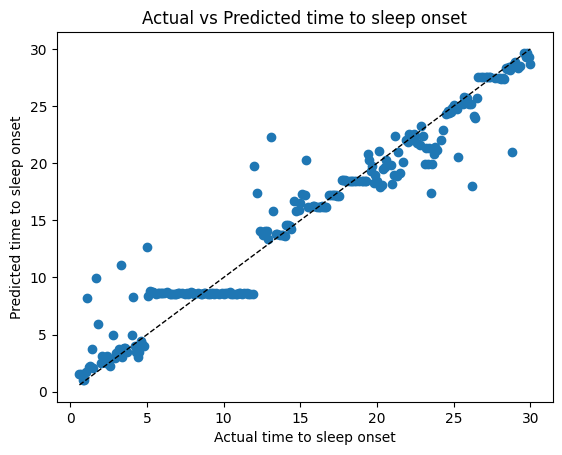

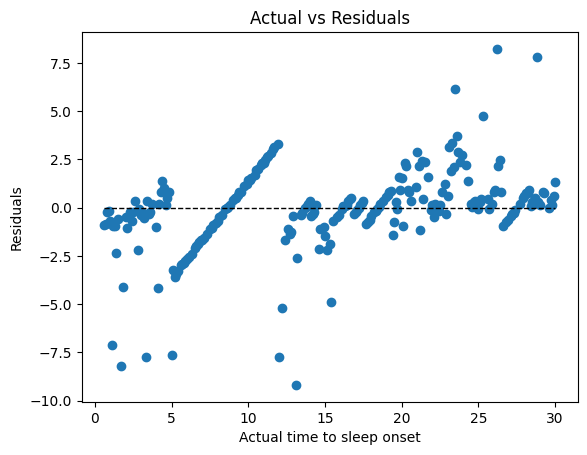

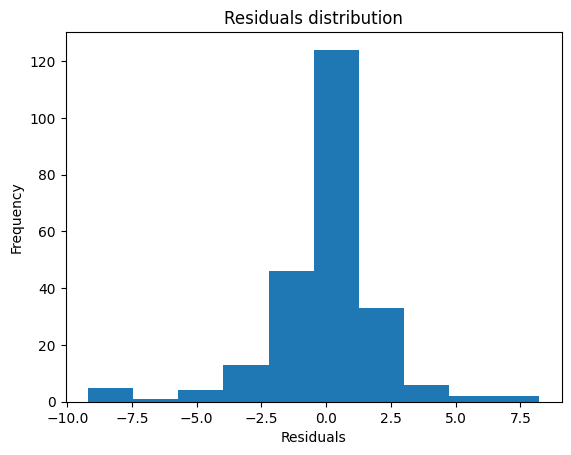

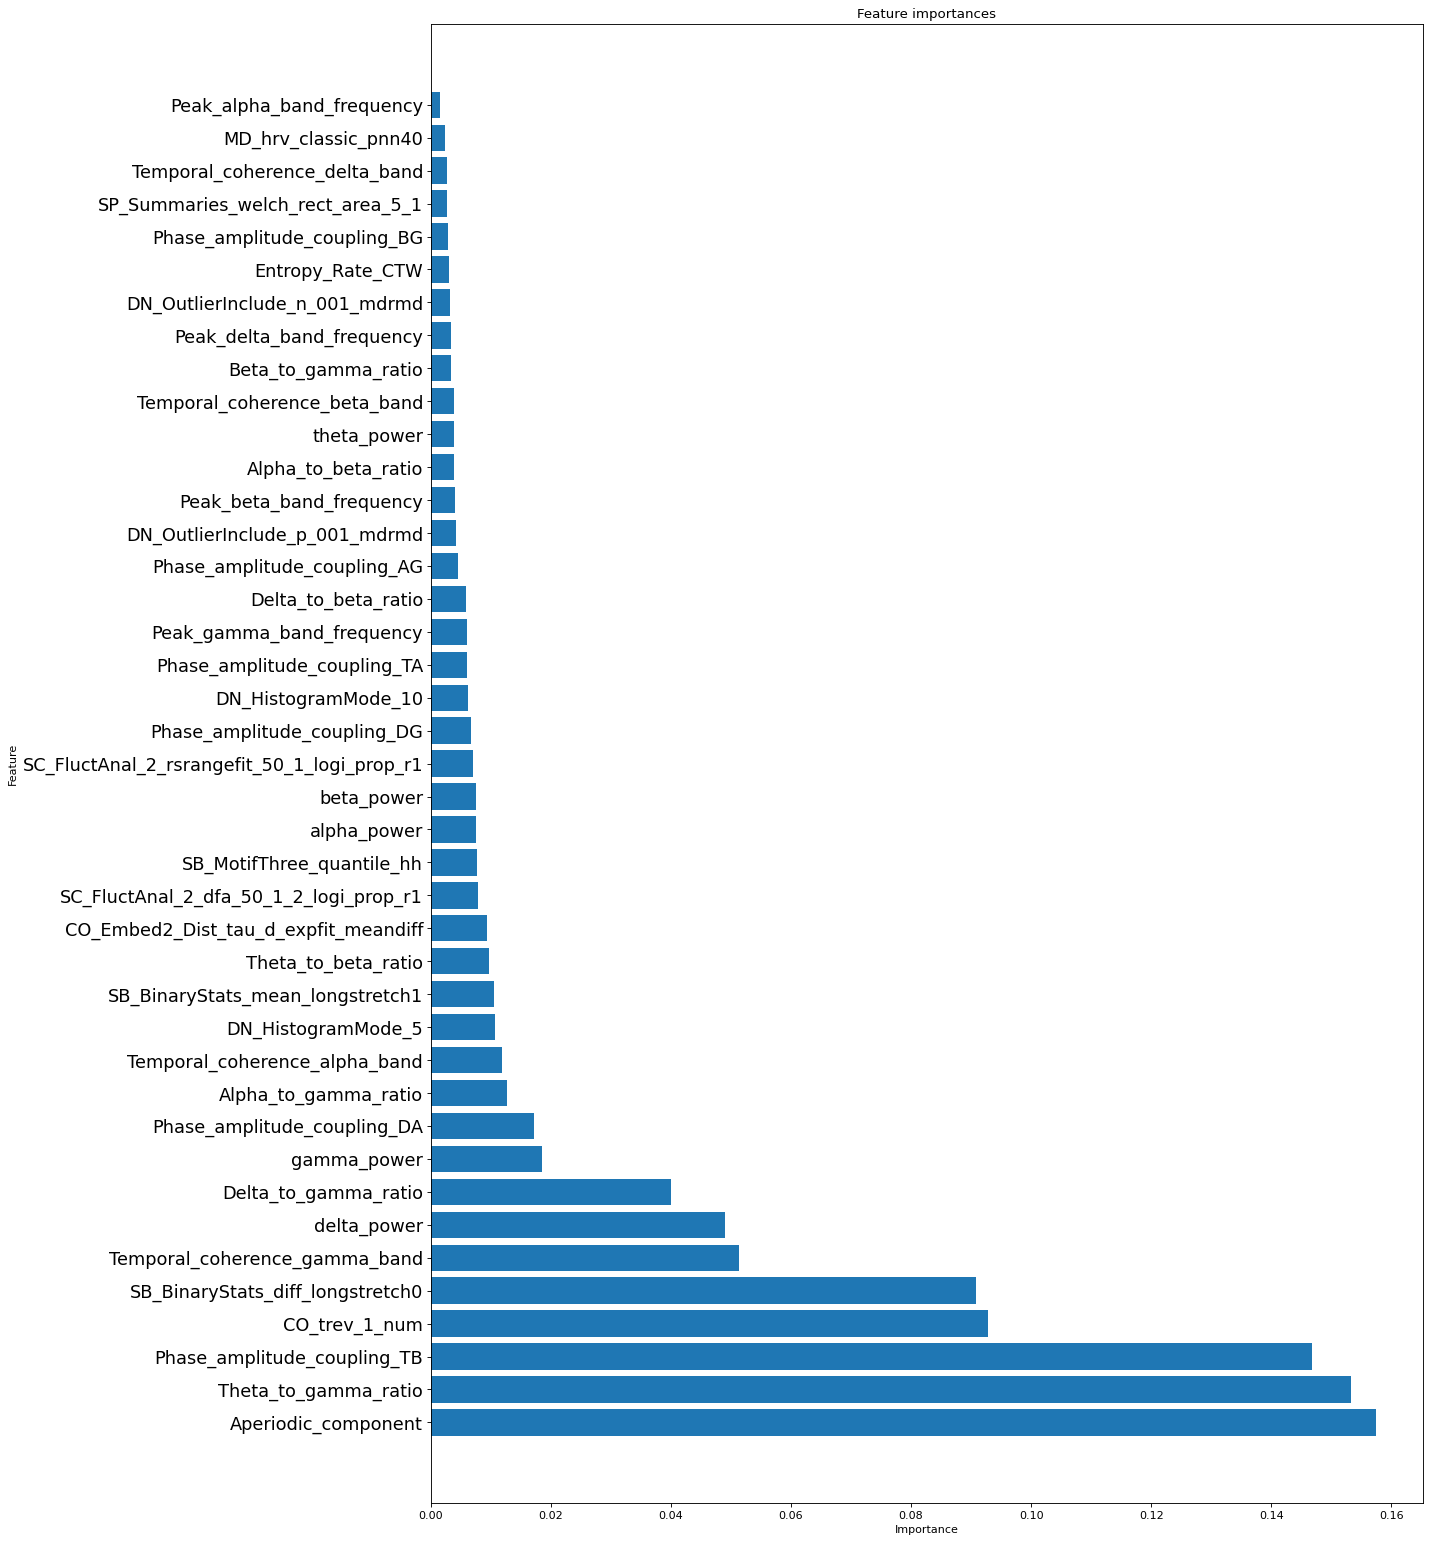

In [128]:

# Assess the model performance
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate the mean squared error
mse_after_selection = mean_squared_error(y_train_after_selection, predictions_after_selection)
# Calculate the root mean squared error
rmse_after_selection = np.sqrt(mse_after_selection)
# Calculate the R-squared score
r2_after_selection = r2_score(y_train_after_selection, predictions_after_selection)

print('Mean squared error: ', mse_after_selection)
print('Root mean squared error: ', rmse_after_selection)
print('R-squared score: ', r2_after_selection)

# Plot the predictions vs the actual values and reference line

plt.plot([y_train_after_selection.min(), y_train_after_selection.max()], [y_train_after_selection.min(), y_train_after_selection.max()], 'k--', lw=1)
plt.scatter(y_train_after_selection, predictions_after_selection)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted time to sleep onset')
plt.show()

# Plot the residuals with a reference line at 0
residuals_after_selection = y_train_after_selection - predictions_after_selection
plt.scatter(y_train_after_selection, residuals_after_selection)
plt.plot([y_train_after_selection.min(), y_train_after_selection.max()], [0, 0], 'k--', lw=1)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

# Plot the residuals distribution

plt.hist(residuals_after_selection)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_after_selection = rf_regressor_after_selection.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_after_selection)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_subset.shape[1]), importances_after_selection[indices], align='center')
ax.set_yticks(range(X_subset.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



In [129]:
# Calculate mean absolute error (MAE)
errors_after_selection = abs(y_train_after_selection - predictions_after_selection)

# Calculate mean absolute percentage error (MAPE)
mae_after_selection = np.mean(errors_after_selection)

# Calculate mean absolute percentage error (MAPE)

mape_after_selection = 100 * (errors_after_selection / y_train_after_selection)

# Calculate and display accuracy
accuracy_after_selection = 100 - np.mean(mape_after_selection)

print('Mean Absolute Error:', round(mae_after_selection, 2))
print('Accuracy:', round(accuracy_after_selection, 2), '%.')


Mean Absolute Error: 1.36
Accuracy: 78.16 %.


In [130]:
# Display the comparrison of the performances before and after feature selection for mse, rmse, r2, mae and accuracy


print('Mean squared error: ', mse)
print('Mean squared error after feature selection: ', mse_after_selection)


print('Root mean squared error: ', rmse)
print('Root mean squared error after feature selection: ', rmse_after_selection)

print('R-squared score: ', r2)
print('R-squared score after feature selection: ', r2_after_selection)








Mean squared error:  4.628479053013391
Mean squared error after feature selection:  4.610106088354314
Root mean squared error:  2.151390028101225
Root mean squared error after feature selection:  2.147115760352551
R-squared score:  0.93727707305097
R-squared score after feature selection:  0.9375260546509618


In [131]:
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean Absolute Error after feature selection:', round(mae_after_selection, 2))
print('Accuracy after feature selection:', round(accuracy_after_selection, 2), '%.')


Mean Absolute Error: 1.37
Accuracy: 78.65 %.
Mean Absolute Error after feature selection: 1.36
Accuracy after feature selection: 78.16 %.


In [144]:
from sklearn.model_selection import RandomizedSearchCV
# Perform hyperparameter tuning using RandomizedSearchCV on the selected features

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# criterion
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'] 

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_regressor_random = RandomizedSearchCV(estimator=rf_regressor, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_regressor_random.fit(X_train_after_selection, y_train_after_selection)





Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=110, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=110, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=110, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=squared_error, max_depth=40, min_samples

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [137]:
# Print the best parameters and score
print(rf_regressor_random.best_params_)
print(rf_regressor_random.best_score_)
print(rf_regressor_random.best_estimator_)
print(rf_regressor_random.best_index_)
print(rf_regressor_random.scorer_)
print(rf_regressor_random.n_splits_)
print(rf_regressor_random.refit_time_)



{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 110, 'criterion': 'absolute_error', 'bootstrap': True}
0.8759100039325526
RandomForestRegressor(criterion='absolute_error', max_depth=110,
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)
17
<function _passthrough_scorer at 0x16883b9c0>
3
2.056703805923462


In [138]:
# Print the best parameters and score
print(rf_regressor_random.cv_results_)



{'mean_fit_time': array([7.3946677 , 0.20948267, 0.68112501, 1.37826737, 0.83428224,
       0.97753239, 0.97856156, 0.18932597, 4.08293287, 0.58304199,
       4.3974967 , 0.81007759, 5.0760839 , 0.43951901, 0.72711539,
       1.52264635, 0.47832664, 1.44373624, 1.46329927, 0.13580147,
       1.80659262, 1.87471676, 2.467803  , 0.7968324 , 0.93850772,
       0.47145398, 0.33670823, 0.86150336, 1.20915842, 1.74649692,
       4.9549257 , 0.63280805, 1.26301122, 1.28292624, 0.57213473,
       0.89281154, 5.00998465, 0.56486964, 1.31703774, 4.1341339 ,
       1.75723322, 1.15290626, 0.40316757, 1.01280777, 0.73690661,
       0.53239298, 0.51923402, 1.44224636, 0.45194769, 0.20919824,
       9.59534748, 1.64697933, 1.09721414, 0.82855439, 2.2921377 ,
       1.70476675, 0.76322405, 2.13236348, 1.40626375, 0.26875432,
       0.67810726, 0.99653284, 1.3082784 , 1.40383673, 1.19839398,
       0.36572329, 0.14269066, 0.49019249, 0.7621607 , 0.25636705,
       5.62899804, 0.72281766, 0.85715318, 1

Mean Absolute Error: 1.14
Accuracy: 86.72 %.
Mean squared error:  3.2777252702448276
Root mean squared error:  1.8104489140113365
R-squared score:  0.9513633356389459


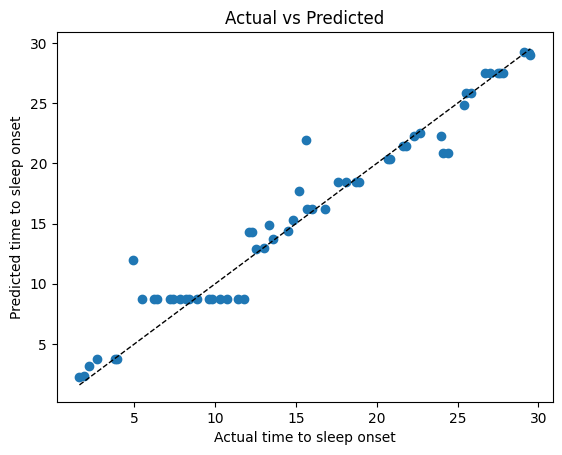

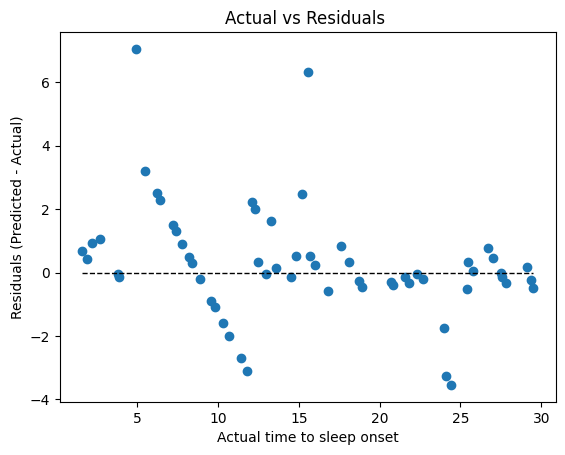

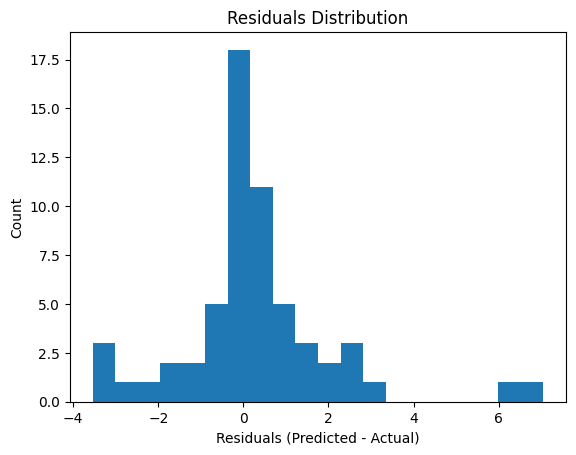

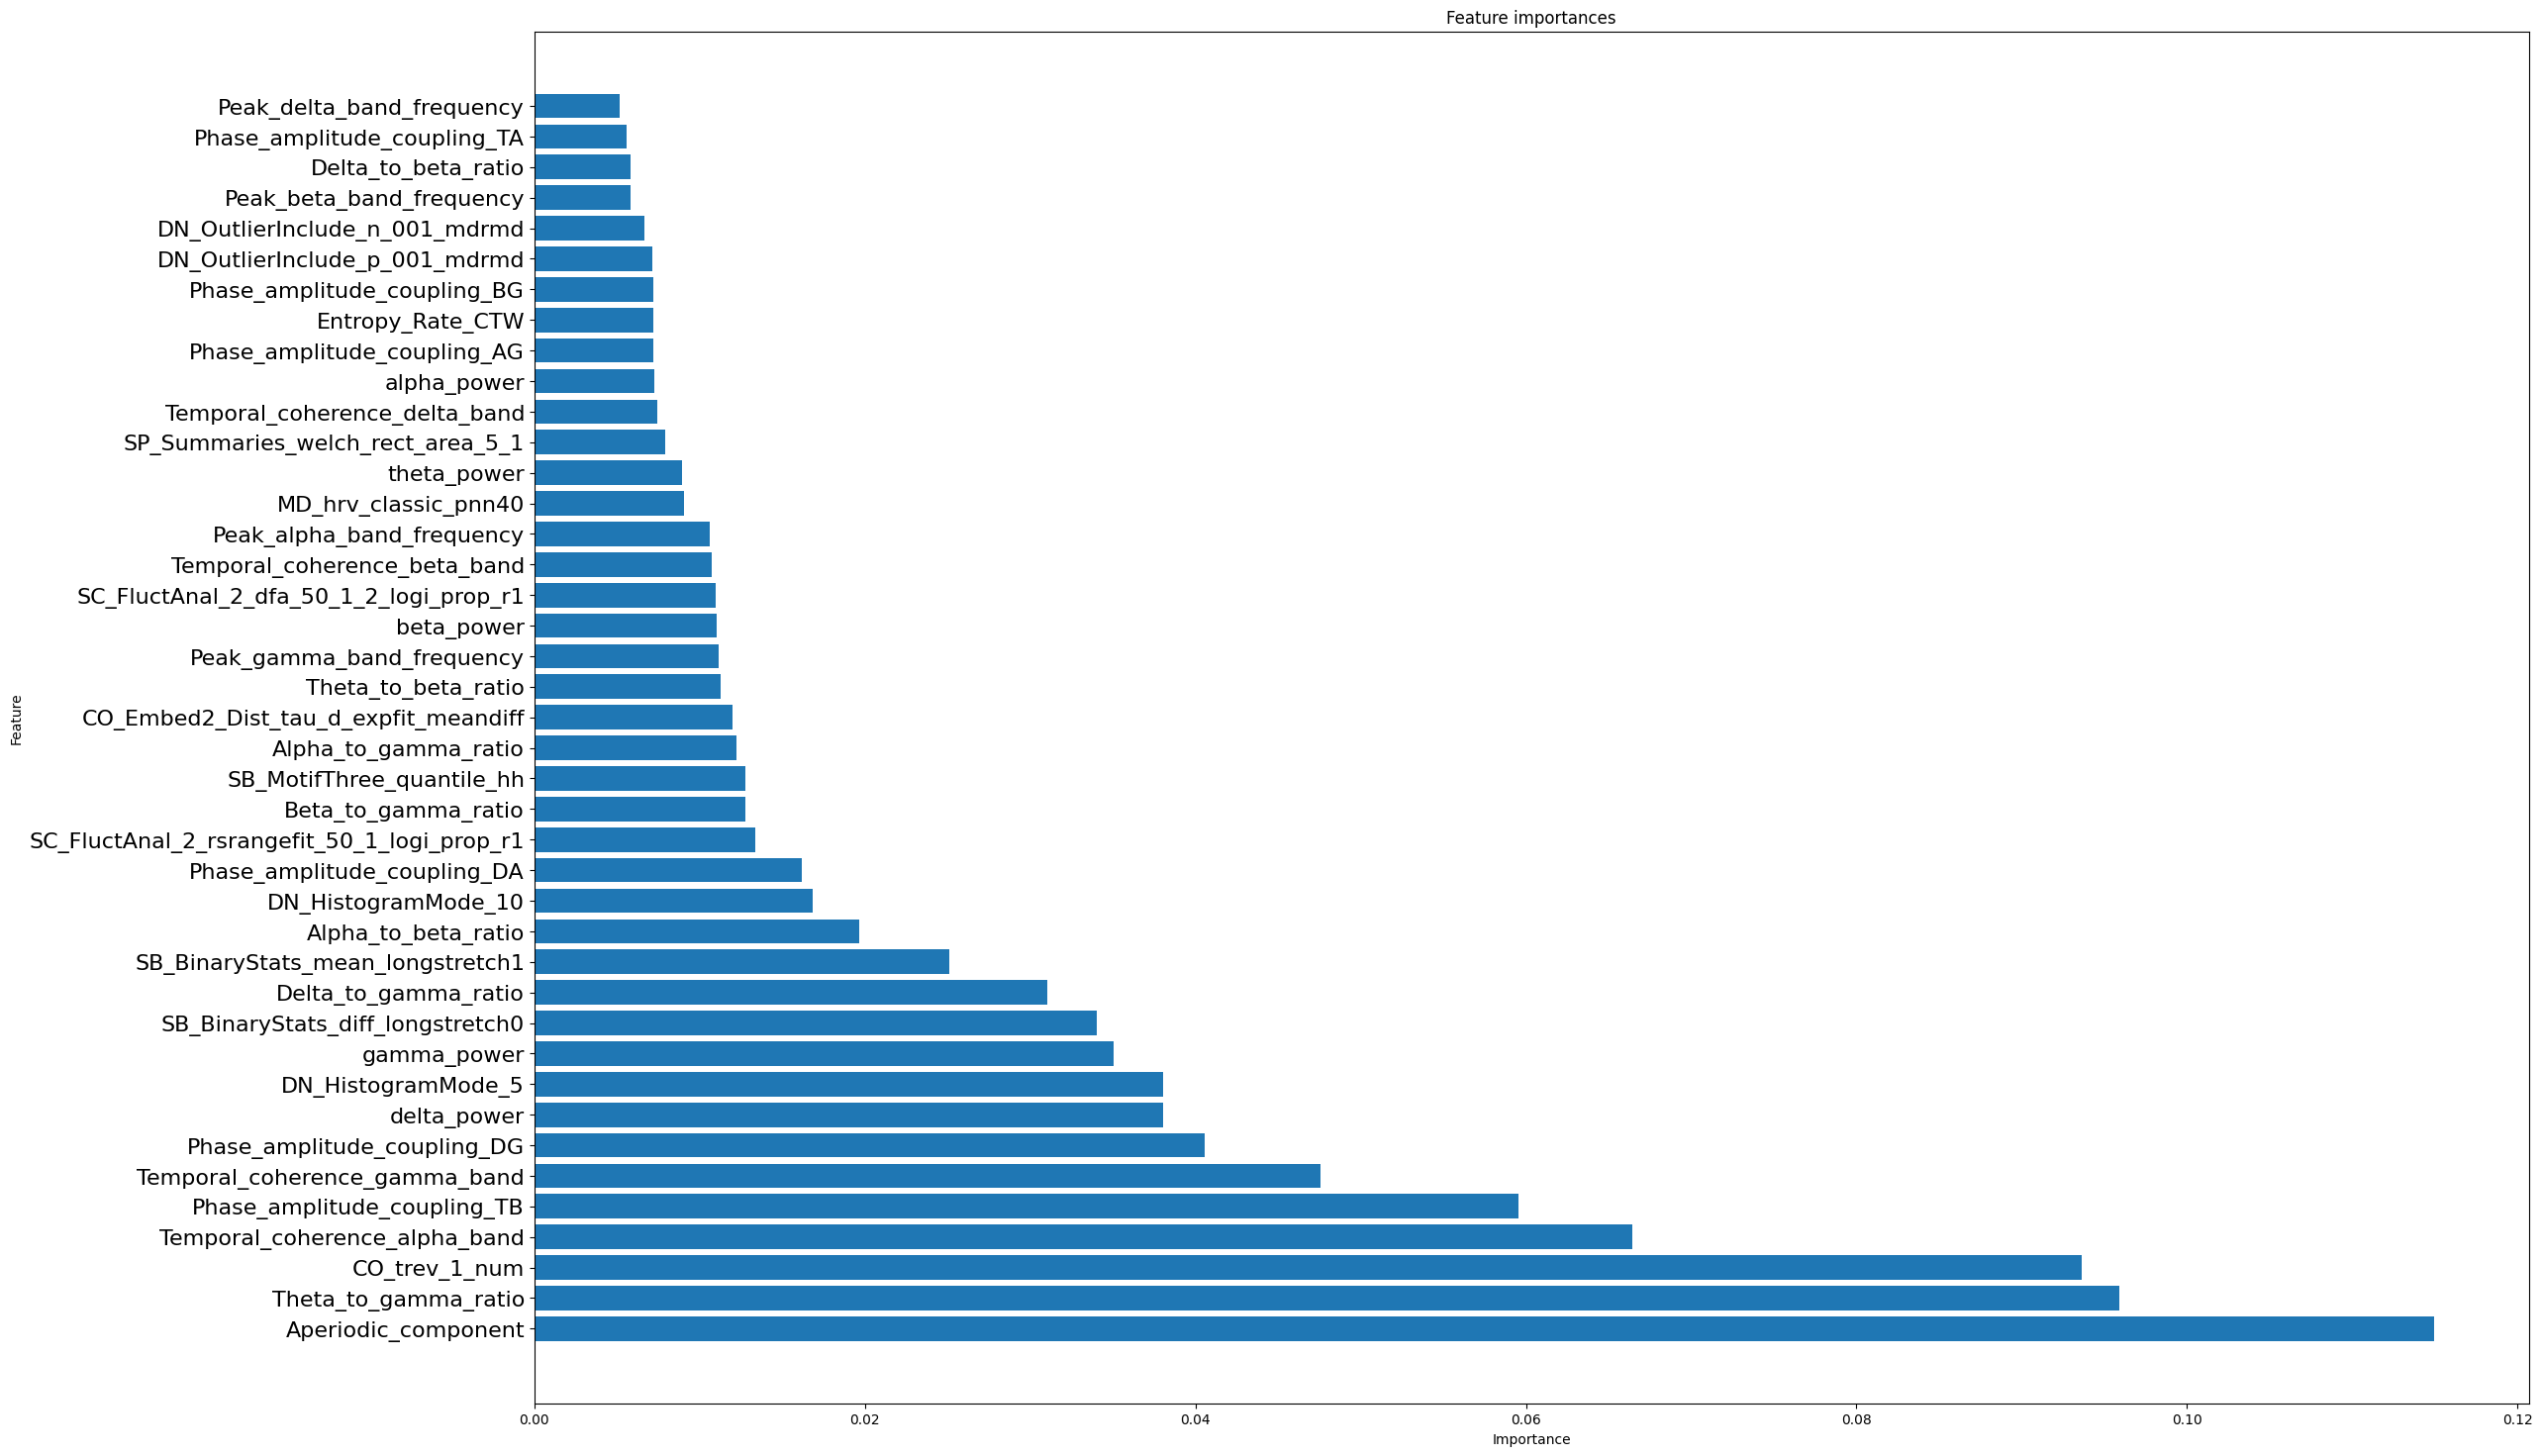

In [152]:
# Make predictions using the tuned model
predictions = rf_regressor_random.predict(X_test_after_selection)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('R-squared score: ', r2)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.scatter(y_test, predictions)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test, predictions - y_test)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Actual vs Residuals ')
plt.show()

# Plot the residuals distribution

plt.hist(predictions - y_test, bins=20)
plt.xlabel('Residuals (Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.show()



# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances = rf_regressor_random.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_test_after_selection.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(26, 18))

ax.barh(range(X_test_after_selection.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X_test_after_selection.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



Mean Absolute Error: 1.12
Accuracy: 88.39 %.
Mean squared error:  3.1829251902988416
Root mean squared error:  1.7840754441163191
R-squared score:  0.9527700306147544


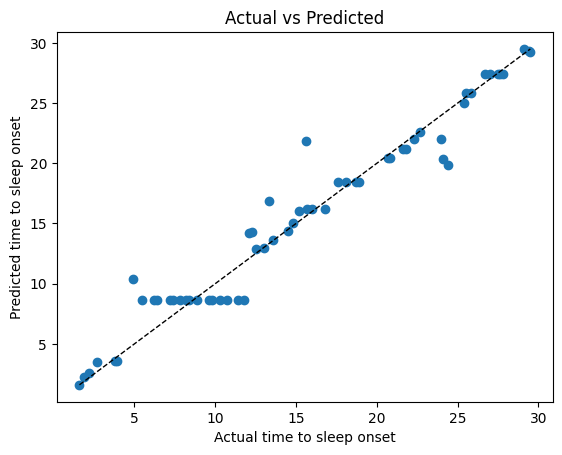

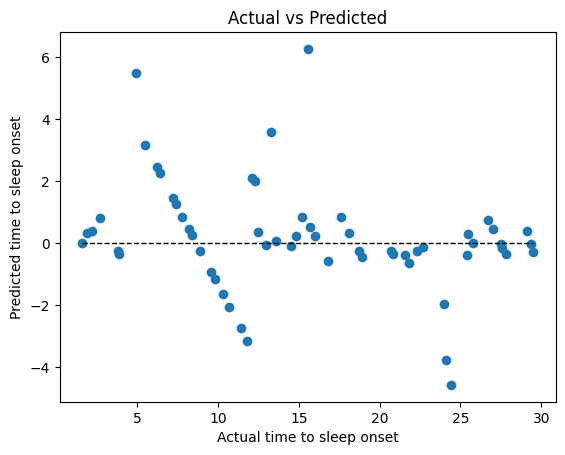

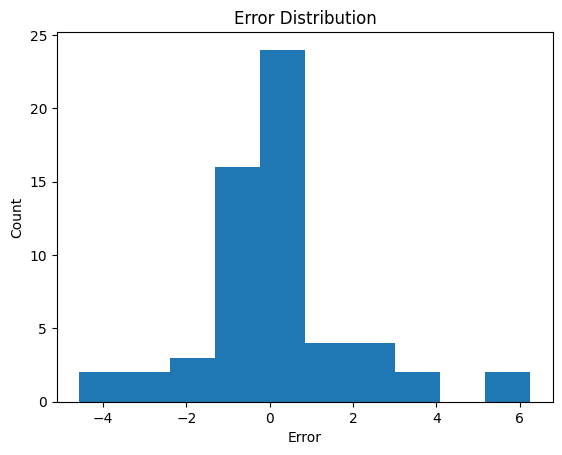

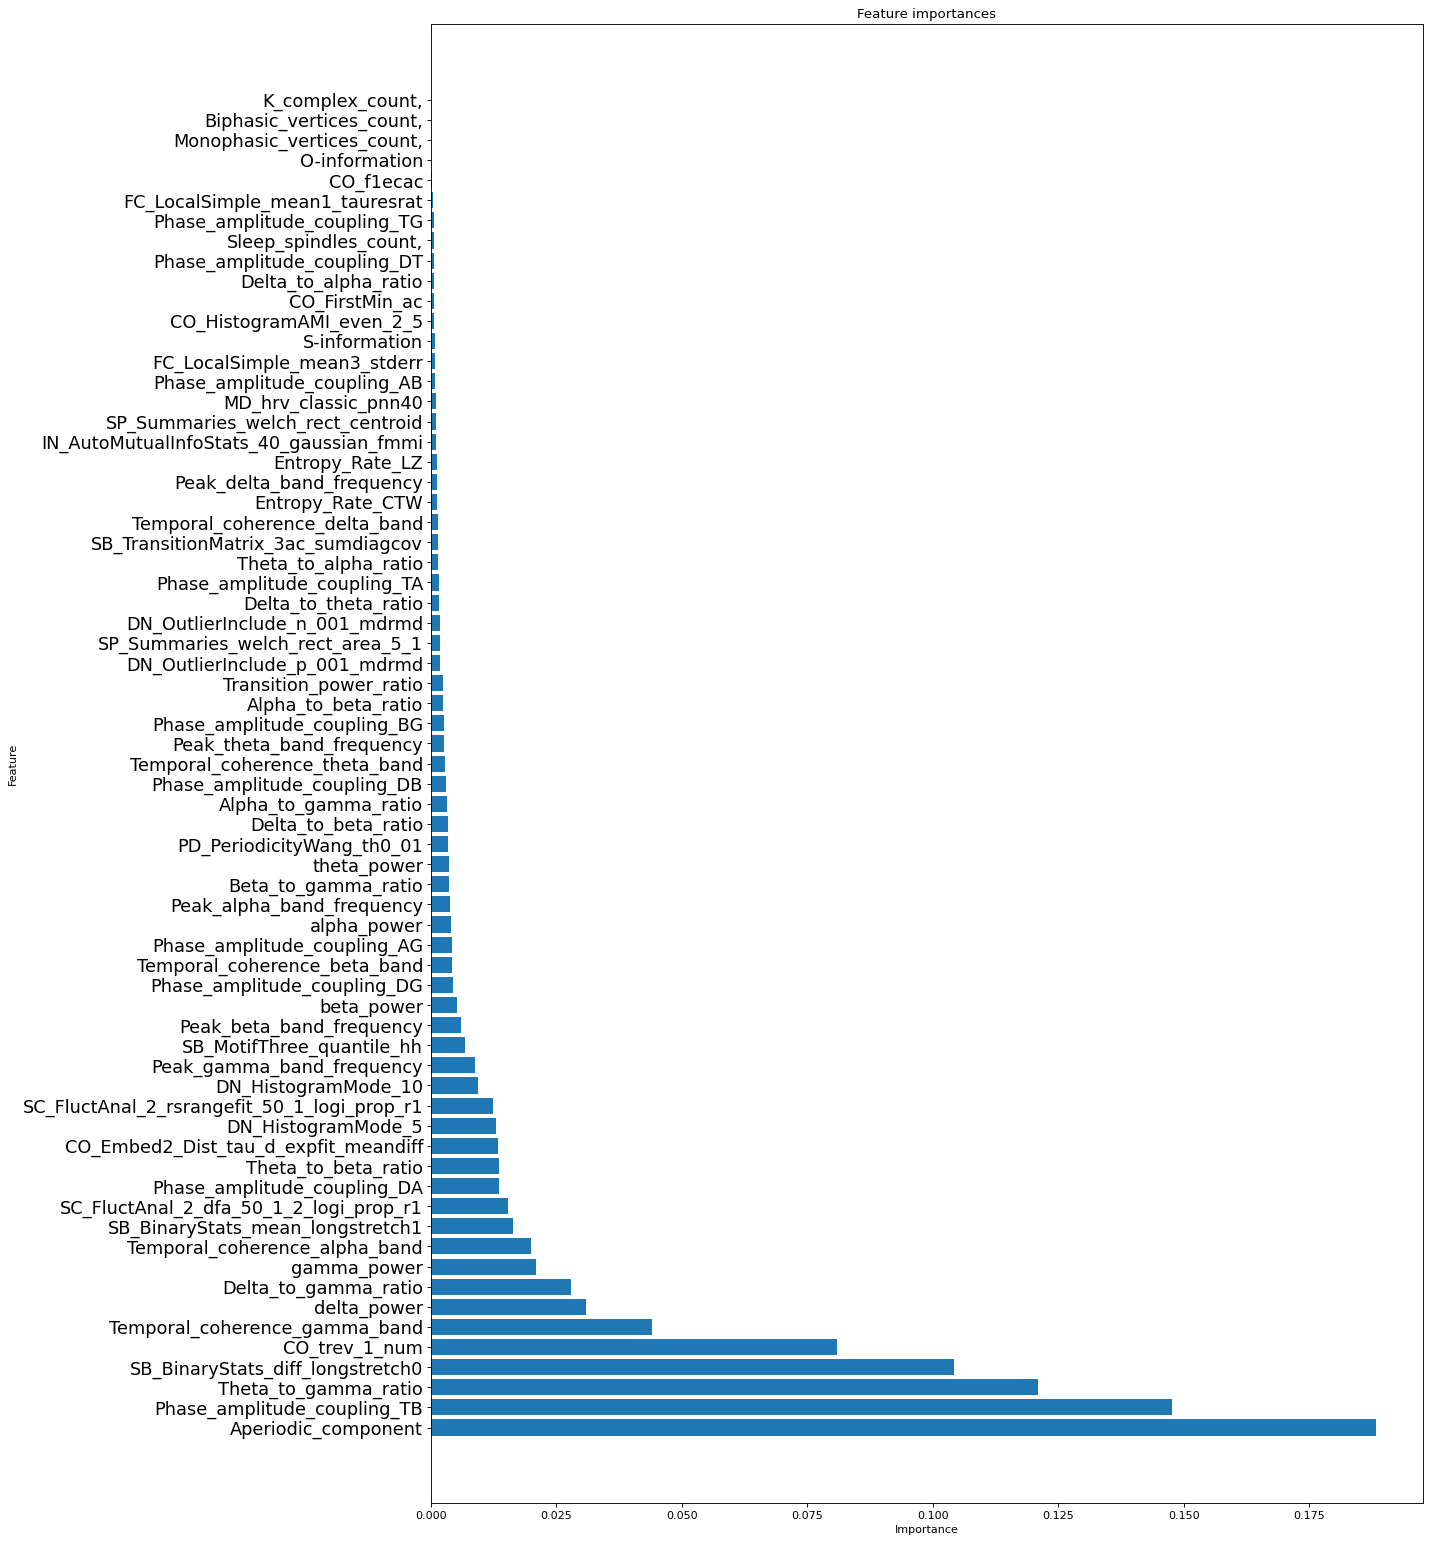

In [150]:
# Try a baseline model of random forest (before hyperparameter tuning) on the test set

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions using the untuned model
predictions = rf_regressor.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('R-squared score: ', r2)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.scatter(y_test, predictions)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test, predictions - y_test)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals distribution
residuals = predictions - y_test
plt.hist(residuals)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_baseline = rf_regressor.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_baseline)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [mydata.columns[i+2] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X.shape[1]), importances_baseline[indices], align='center')
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



# Regression from a time-window of feature-based representation of EEG signal 

## Random forest

### Flatten the time-window in a feature vector (e.g. if we have 67 features for 10 epochs, it would have length of 670 features) 
###





Drawbacks: the model won't inherently understand the temporal relationship between the features in each segment, because it is seeing them as a flat set of features. This is limitation of models like random forest when used with the time series data. 

In [ ]:

# Flatten the segmented data into 2D array, which is required by RandomForestRegressor
X = X.reshape(1000, -1)

# Split the data in the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set (initial results)
# predictions = rf_regressor.predict(X_test)

In [ ]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({"feature": df.columns, "importance": importances})

# Sort the DataFrame to show the features with the highest importance first
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

print(feature_importances)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)

# Using simple RNNs 

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Assuming `data` is your feature-based EEG segments and `targets` are your target values
X = data.reshape((n_samples, n_timesteps, n_features))
y = targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)





In [ ]:
# Define the class

class SimpleRNN(nn.Module):
    def __init__(self, n_features):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=n_features, hidden_size=50, num_layers=1, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x

model = SimpleRNN(n_features=67)

In [ ]:
# Compile and train
import torch.optim as optim

# Specify loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

In [ ]:
# Evaluate
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test)

print(f'Test loss: {loss.item()}')